In [2]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import arviz as az

import pymc3 as pm

### Recreate function to do grid approximation

In [5]:
def grid_posterior_approximation(grid_samples, success, tosses):
    # Create grid
    p_grid = np.linspace(0, 1, grid_samples)
    # Define priors
    prior = np.repeat(1, grid_samples)
    # likelihood
    like = stats.binom.pmf(success, n=tosses, p=p_grid)
    # Unstandardized posterior
    unst_post = like * prior
    # Standardized posterior
    posterior = unst_post/unst_post.sum()
    
    return p_grid, posterior

In [6]:
p_grid, posterior = grid_posterior_approximation(1000, 6, 9)

In [9]:
# Generate samples from posterior distribution
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

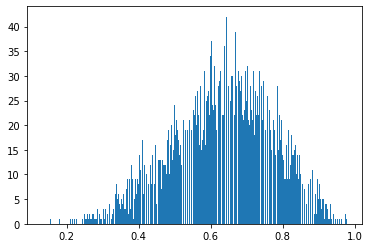

In [12]:
plt.hist(samples, bins=1000);

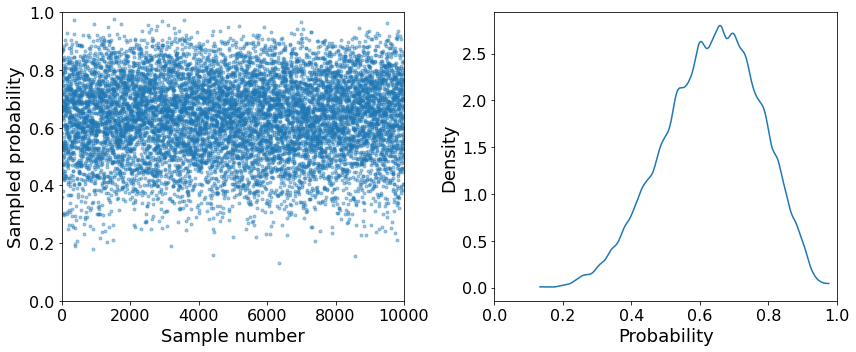

In [27]:
_, axes = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(12,5))
axes[0].plot(np.arange(0, 1e4, 1),
             samples,
             "C0.",
             alpha=0.4)
axes[0].set_xlim(0, 10000)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel("Sample number", fontsize=18)
axes[0].tick_params(axis="both", labelsize=16)
axes[0].set_ylabel("Sampled probability", fontsize=18)
az.plot_kde(samples, ax=axes[1])
axes[1].set_xlabel("Probability", fontsize=18)
axes[1].set_xlim(0,1)
axes[1].tick_params(axis="both", labelsize=16)
axes[1].set_ylabel("Density", fontsize=18)

plt.tight_layout()

In [28]:
p_grid[np.argmax(posterior)]

0.6666666666666666

In [40]:
stats.mode(samples).mode[0]

0.6436436436436437

### Posterior predictive distribution

In [53]:
p_grid, posterior = grid_posterior_approximation(1000, 6, 9)

In [42]:
# Example of simulated likelihood

like_p = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

In [59]:
np.shape(samples)

(10000,)

In [61]:
like = stats.binom.rvs(n=9, p=samples)

In [62]:
np.shape(like)

(10000,)

In [63]:
like = (like_dists * posterior)/(like_dists * posterior).sum()

### Exercises

In [110]:
%config InlineBackend.figure_format = 'retina'

#### Create grid posterior approximation for toss example

In [64]:
def grid_posterior_approximation(num_samples, success, tosses):
    # Define grid
    p_grid = np.linspace(0, 1, num_samples)
    # Define prior
    prior = np.repeat(1, num_samples)
    # Define likelihood
    like = stats.binom.pmf(success, n=tosses, p=p_grid)
    # Unstandardized posterior
    unst_post = like * prior
    # Standardized posterior
    posterior = unst_post/unst_post.sum()
    
    return p_grid, posterior

#### Calculate posterior

In [133]:
success = 6
tosses = 9
num_samples = 1000000

p_grid, posterior = grid_posterior_approximation(num_samples, success, tosses)

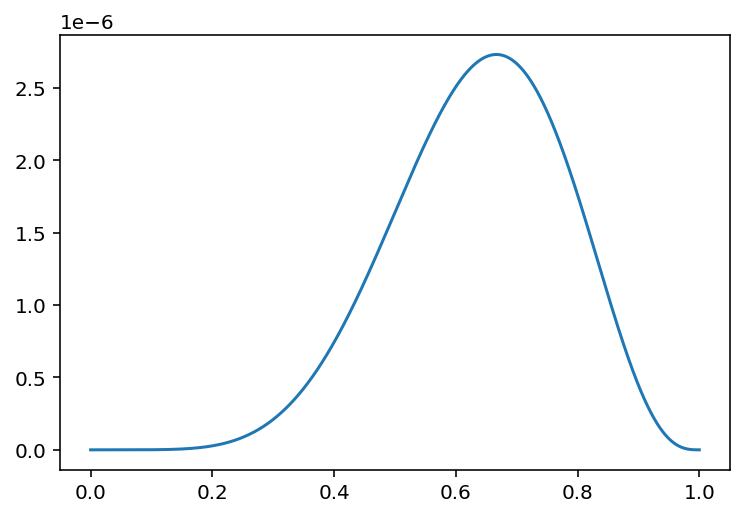

In [134]:
plt.plot(p_grid, posterior)

#### Sample posterior distribution

In [135]:
sample_size = 10000

In [136]:
samples = np.random.choice(p_grid, replace=True, p=posterior, size=sample_size)

<AxesSubplot:>

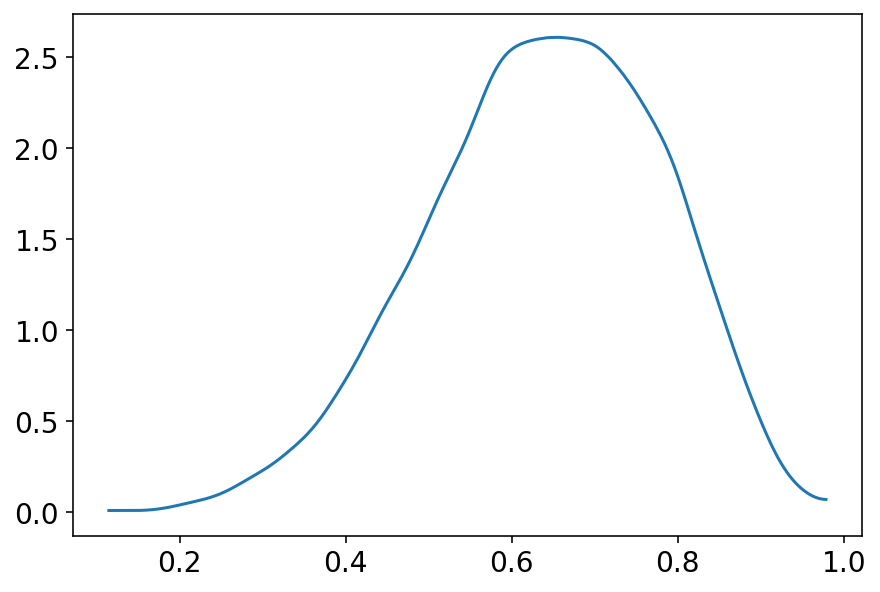

In [137]:
az.plot_kde(samples)

#### Ex. E1

In [142]:
M_l02 = (samples < 0.2).sum()/len(samples)
print(f"Probability mass for values of the parameter p below 0.2: {M_l02:.2%}")

Probability mass for values of the parameter p below 0.2: 0.10%


#### Ex. E2

In [139]:
M_m08 = (samples > 0.8).sum()/len(samples)
print(f"Probability mass for values of the parameter p above 0.8: {M_m08:.2%}")

Probability mass for values of the parameter p above 0.8: 12.73%


#### Ex. E4

In [140]:
q_20 = np.quantile(samples, 0.2)
print(f"20% of posterior probability lies below p={q_20:.2}")

20% of posterior probability lies below p=0.52


#### Ex. E5

In [141]:
q_80 = np.quantile(samples, 0.8)
print(f"20% of posterior probability lies above p={q_80:.2}")

20% of posterior probability lies above p=0.76


#### Ex. E6

In [85]:
az.hdi(samples, hdi_prob=0.66)

array([0.50505051, 0.74747475])

#### Ex. E7

In [87]:
np.quantile(samples, [0.17, 1 - 0.17])

array([0.49494949, 0.73737374])

#### Ex. M1

In [88]:
p_grid, posterior = grid_posterior_approximation(100, 8, 15)

#### Ex. M2

In [90]:
samples = np.random.choice(p_grid, size=10_000, replace=True, p=posterior)

In [91]:
az.hdi(samples, hdi_prob=0.9)

array([0.34343434, 0.72727273])

#### Ex. M3

In [157]:
post_predictive_check = stats.binom.rvs(n=15, p=samples)

In [158]:
ratio = (post_predictive_check == 8).sum()/len(post_predictive_check)
print(f"Probability of 8 successes in 15 tosses is {ratio:.2%}")

Probability of 8 successes in 15 tosses is 14.91%


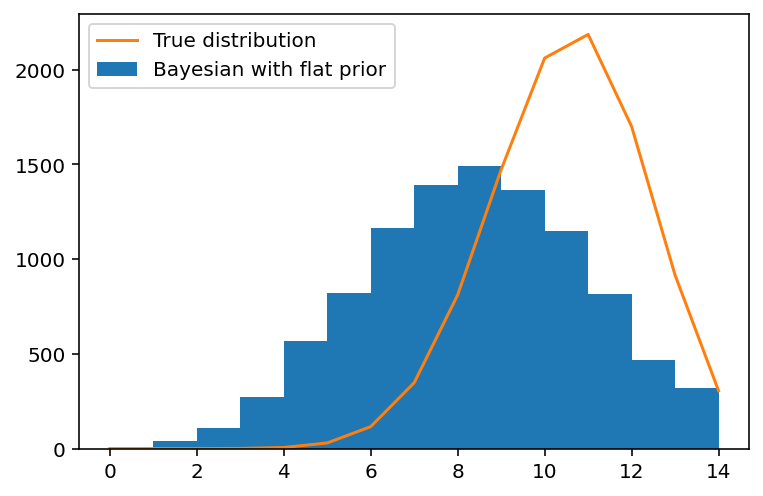

In [160]:
plt.hist(post_predictive_check,
         bins=np.arange(0, 15, 1),
         label="Bayesian with flat prior"
        );
plt.plot(np.arange(0, 15, 1),
         10_000*stats.binom.pmf(np.arange(0, 15, 1), n=15, p=0.7),
         label="True distribution"
        )
plt.legend()

#### Ex. M4

In [162]:
post_predictive_check = stats.binom.rvs(n=9, p=samples)

In [163]:
ratio = (post_predictive_check == 6).sum()/len(post_predictive_check)
print(f"Probability of 8 successes in 15 tosses is {ratio:.2%}")

Probability of 8 successes in 15 tosses is 17.12%


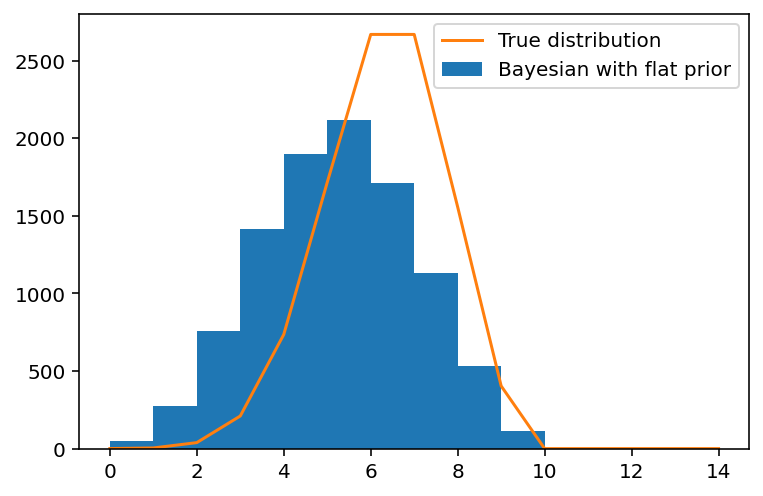

In [164]:
plt.hist(post_predictive_check,
         bins=np.arange(0, 15, 1),
         label="Bayesian with flat prior"
        );
plt.plot(np.arange(0, 15, 1),
         10_000*stats.binom.pmf(np.arange(0, 15, 1), n=9, p=0.7),
         label="True distribution"
        )
plt.legend()

#### Ex. M5

In [172]:
def grid_approximation_posterior_heaviside(num_samples, success, tosses):
    p_grid = np.linspace(0, 1, num_samples)
    prior = np.heaviside(p_grid - 0.5, 0.5)
    like = stats.binom.pmf(success, n=tosses, p=p_grid)
    unst_post = like * prior
    posterior = unst_post/unst_post.sum()
    
    return p_grid, posterior

In [173]:
p_grid, posterior = grid_approximation_posterior_heaviside(100, 8, 15)

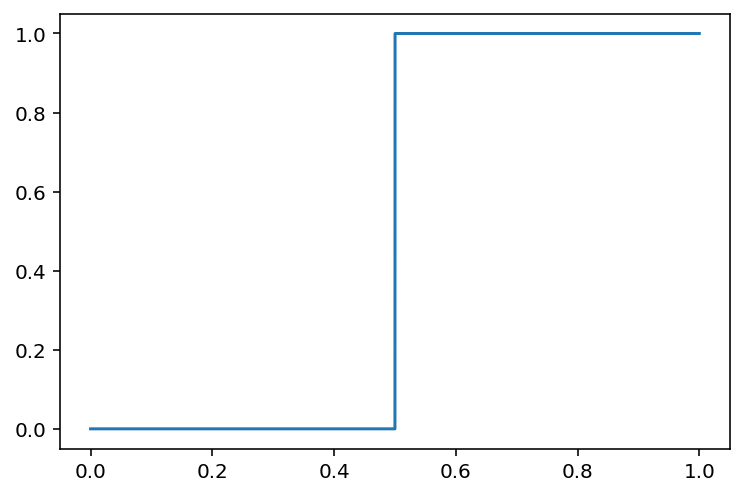

In [174]:
plt.plot(np.linspace(0, 1, num_samples), np.heaviside(np.linspace(0, 1, num_samples)-0.5, 0.5))

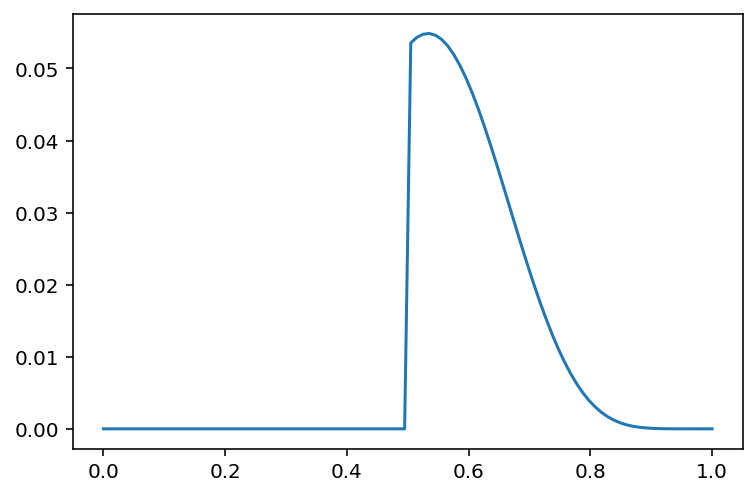

In [175]:
plt.plot(p_grid, posterior)

In [176]:
samples = np.random.choice(p_grid, size=10_000, replace=True, p=posterior)

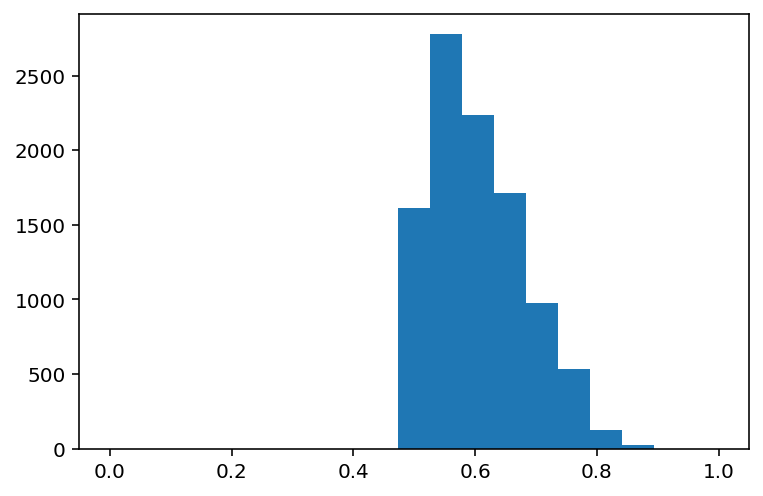

In [178]:
plt.hist(samples, 
         np.linspace(0, 1, 20));

In [168]:
az.hdi(samples, hdi_prob=0.9)

array([0.34343434, 0.72727273])

In [179]:
posterior_predictive_check = stats.binom.rvs(n=15, p=samples)

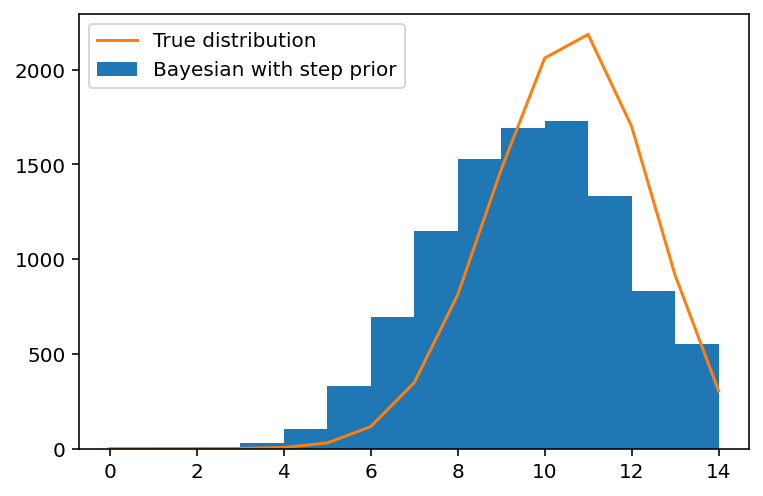

In [185]:
bins = np.arange(0, 15, 1)
plt.hist(posterior_predictive_check, 
         bins=bins,
         label="Bayesian with step prior"
        );

plt.plot(bins,
         10_000 * stats.binom.pmf(bins, n=15, p=0.7),
         label="True distribution")
plt.legend()

With 9 tosses

In [186]:
posterior_predictive_check = stats.binom.rvs(n=9, p=samples)

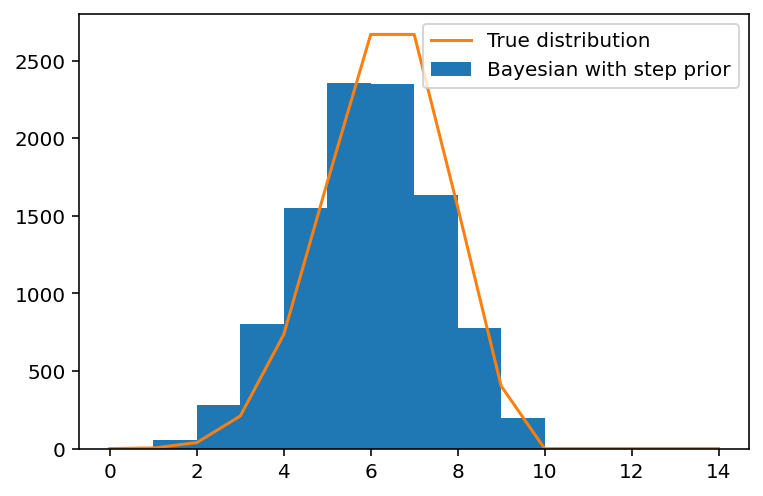

In [188]:
bins = np.arange(0, 15, 1)
plt.hist(posterior_predictive_check, 
         bins=bins,
         label="Bayesian with step prior"
        );

plt.plot(bins,
         10_000 * stats.binom.pmf(bins, n=9, p=0.7),
         label="True distribution")
plt.legend()

#### Ex. M6

In [199]:
grid = np.linspace(0, 1, 10)  # define a grid of ground truth values
trials_for_p = []

for p in grid:
    num_trials = []
    for i in range(10):
        p_range = 1
        tosses = 1
        while p_range > 0.05:
            success = stats.binom.rvs(n=tosses, p=p)
#             p_grid, posterior = grid_approximation_posterior_heaviside(100,
#                                                                        success,
#                                                                        tosses)
            p_grid, posterior = grid_posterior_approximation(100,
                                                             success,
                                                             tosses)
            samples = np.random.choice(p_grid, size=10_000, replace=True, p=posterior)
            hdi_bound = az.hdi(samples, hdi_prob=0.99)
            p_range = hdi_bound[1] - hdi_bound[0]
            tosses += 1
        num_trials.append(tosses)
    trials_for_p.append(np.mean(num_trials))

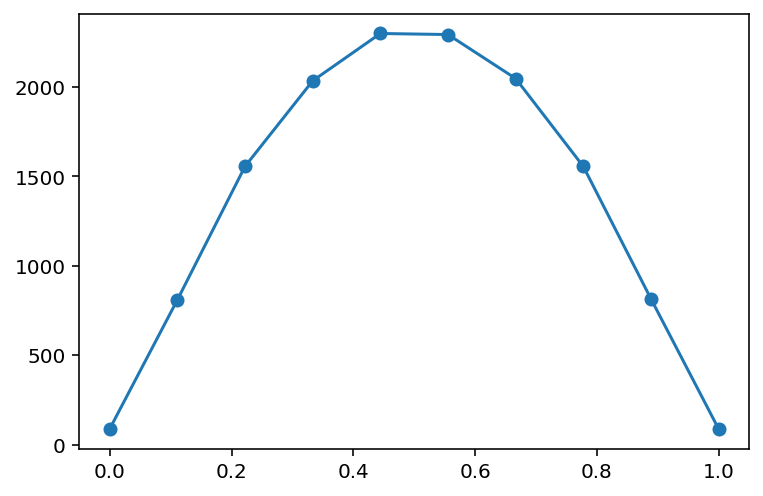

In [200]:
plt.plot(grid, trials_for_p, "C0-o")

#### Ex. H1

In [236]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

In [206]:
boybirth = sum(birth1) + sum(birth2)
total_births = len(birth1 + birth2)

In [207]:
def grid_approximation_boybirth(num_grid_points, num_boys, total_births):
    # Define grid
    p_grid = np.linspace(0, 1, num_grid_points)
    # Define prior
    prior = np.repeat(1, num_grid_points)
    # Define likelihood
    like = stats.binom.pmf(k=num_boys, n=total_births, p=p_grid)
    # Unstandardized posterior
    unst_post = like * prior
    # Standardized posterior
    posterior = unst_post/unst_post.sum()
    
    return p_grid, posterior

In [208]:
p_grid, posterior = grid_approximation_boybirth(100, boybirth, total_births)

The boy_probability that maximizes the posterior probabiliy distribution is

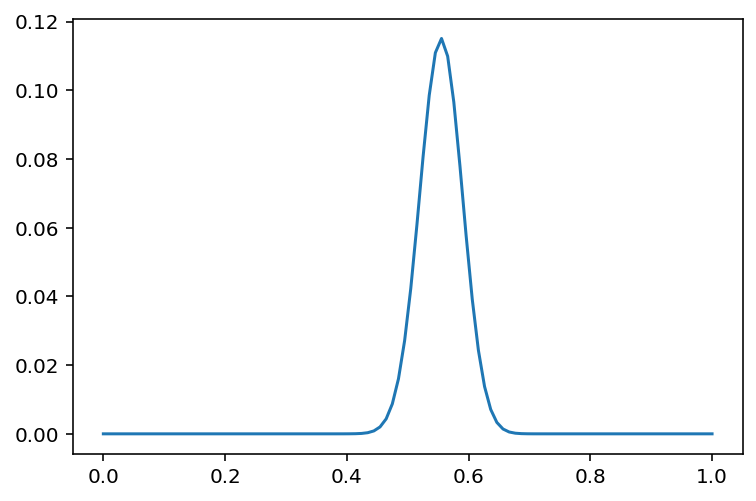

In [210]:
plt.plot(p_grid, posterior)

In [209]:
p_grid[np.argmax(posterior)]

0.5555555555555556

#### Ex. H2

In [211]:
samples = np.random.choice(p_grid, size=10_000, replace=True, p=posterior)

In [214]:
az.hdi(samples, 0.5)

array([0.54545455, 0.58585859])

In [215]:
az.hdi(samples, 0.89)

array([0.49494949, 0.60606061])

In [216]:
az.hdi(samples, 0.97)

array([0.48484848, 0.62626263])

#### Ex. H3

In [217]:
posterior_predictive_check = stats.binom.rvs(n=200, p=samples)

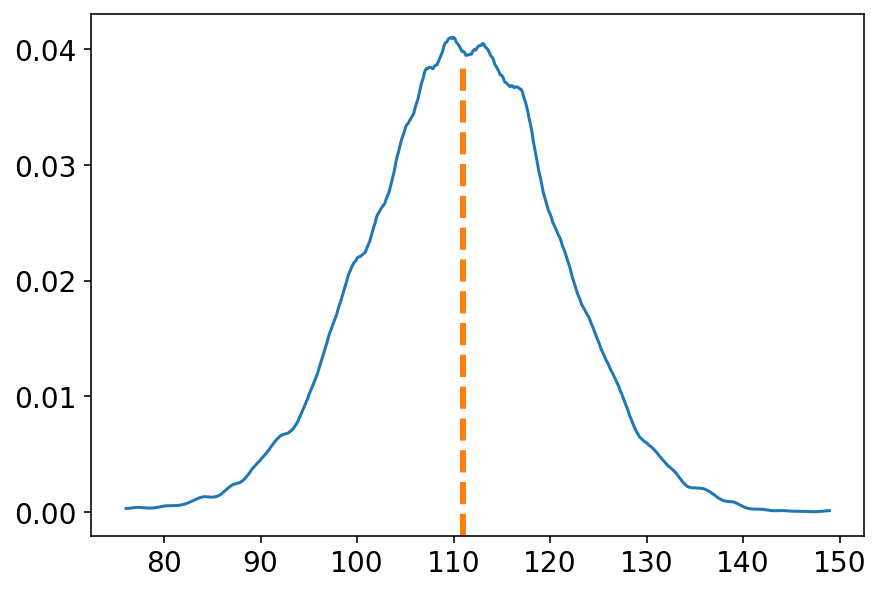

In [227]:
az.plot_kde(posterior_predictive_check)
plt.axvline(x=111, ymin=0, ymax=0.9, color="C1", linestyle="--", linewidth=3)

#### Ex. H4

In [228]:
posterior_predictive_check = stats.binom.rvs(n=100, p=samples)

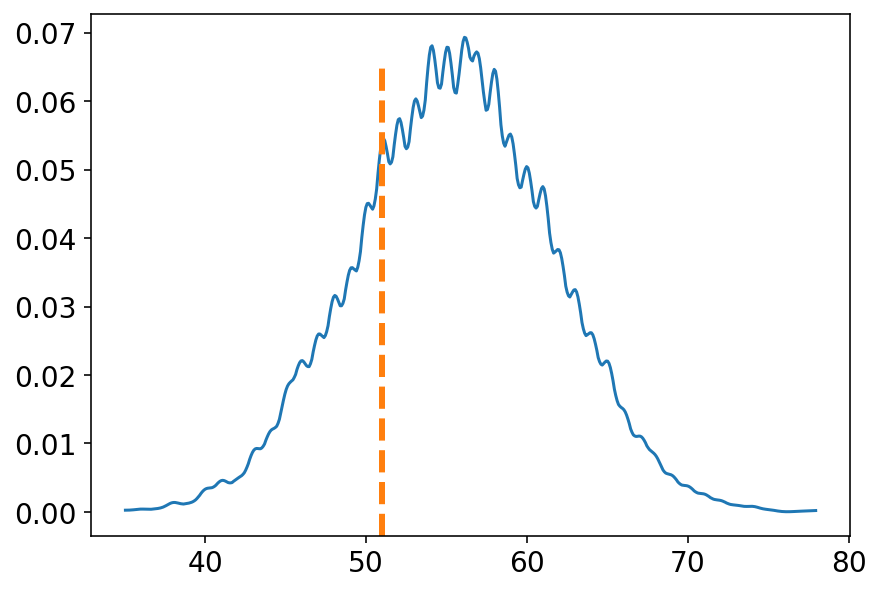

In [229]:
az.plot_kde(posterior_predictive_check)
plt.axvline(x=sum(birth1), ymin=0, ymax=0.9, color="C1", linestyle="--", linewidth=3)

#### Ex. H5

In [251]:
num_births = sum(birth1 == 0)
boy_birth2 = birth2[birth1==0].sum()

In [252]:
posterior_predictive_check = stats.binom.rvs(n=num_births, p=samples)

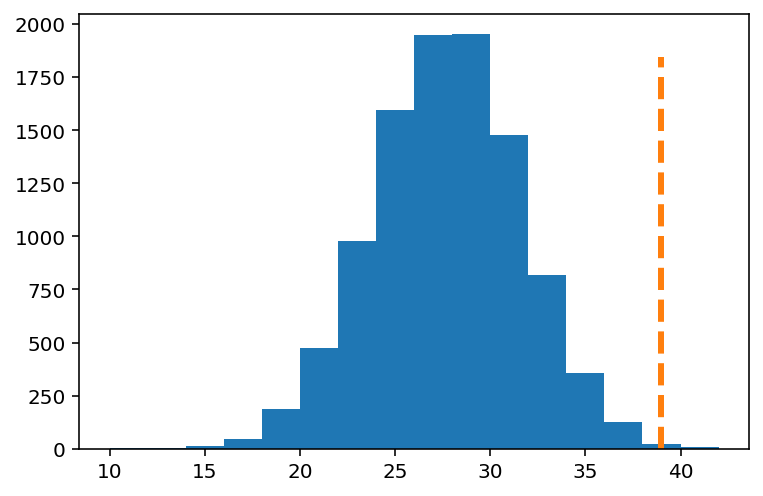

In [253]:
plt.hist(posterior_predictive_check, 
         bins=np.arange(10, 44, 2))
plt.axvline(x=boy_birth2, ymin=0, ymax=0.9, color="C1", linestyle="--", linewidth=3)